In [ ]:
!pip install scrapy

In [ ]:
"""
OBJETIVO: 
  - Extraer las estadísticas a nivel mundial del covid-19
  - Practica 1 Web scraping
CREADO POR: Raúl Sánchez Campos, Pablo Santos Ramos
ULTIMA VEZ EDITADO: 24 MARZO 2021
"""

In [ ]:
from scrapy.spiders import Spider
from scrapy.selector import Selector
from scrapy.loader.processors import MapCompose
from scrapy.crawler import CrawlerProcess

In [ ]:
# CLASE CORE - SPIDER  
class EstadisticaCovidSpider(Spider):
  name = "EstadisticaCovidSpider"
  custom_settings = {
      'USER_AGENT': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Ubuntu Chromium/71.0.3578.80 Chrome/71.0.3578.80 Safari/537.36',
  }
  start_urls = ['https://cambiopolitico.com/estadisticas-covid-19']

  def parse(self, response):
        sel = Selector(response)
        table = sel.xpath('//*[@id="wpcv-table-3"]//table//tbody//tr')
        for row in table: 
            yield {
                'Pais' : row.xpath('td[1]//text()').extract_first(),
                'Total de casos': row.xpath('td[2]//text()').extract_first(),
                'Casos nuevos' : row.xpath('td[3]//text()').extract_first(),
                'Total de muertes' : row.xpath('td[4]//text()').extract_first(),
                'Muertes nuevas' : row.xpath('td[5]//text()').extract_first(),
                'Recuperados' : row.xpath('td[6]//text()').extract_first(),
                'Casos activos' : row.xpath('td[7]//text()').extract_first(),
                'Casos criticos' : row.xpath('td[8]//text()').extract_first(),
            }
       

In [ ]:
process = CrawlerProcess({
    'FEED_FORMAT': 'csv',
    'FEED_URI': 'estadísticas_a_nivel_mundial_covid_19.csv'
})
process.crawl(EstadisticaCovidSpider)
process.start()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('estadísticas_a_nivel_mundial_covid_19.csv', encoding = 'utf8')

In [ ]:
df.head(5)

,Pais,Total de casos,Casos nuevos,Total de muertes,Muertes nuevas,Recuperados,Casos activos,Casos criticos
0,USA,"31,802,772",-,"574,840",-,"24,346,766","6,881,166","9,078"
1,Brasil,"13,375,414",-,"348,934",-,"11,791,885","1,234,595","8,318"
2,India,"13,205,926","3,143","168,467",-,"11,990,859","1,046,600","8,944"
3,Francia,"4,980,501",-,"98,395",-,"303,639","4,578,467","5,729"
4,Rusia,"4,632,688","8,704","102,649",402,"4,258,279","271,760","2,300"


In [ ]:
df.loc[df['Casos nuevos'] == '-', 'Casos nuevos'] = "0"
df.loc[df['Muertes nuevas'] == '-', 'Muertes nuevas'] = "0"
df.loc[df['Total de muertes'] == '-', 'Total de muertes'] = "0"
df.loc[df['Muertes nuevas'] == '-', 'Muertes nuevas'] = "0"
df.loc[df['Recuperados'] == '-', 'Recuperados'] = "0"
df.loc[df['Casos activos'] == '-', 'Casos activos'] = "0"
df.loc[df['Casos criticos'] == '-', 'Casos criticos'] = "0"

In [ ]:
df["Total de casos"] = df["Total de casos"].str.replace(",", "").astype(float)
df["Casos nuevos"] = df["Casos nuevos"].str.replace(",", "").astype(float)
df["Total de muertes"] = df["Total de muertes"].str.replace(",", "").astype(float)
df["Muertes nuevas"] = df["Muertes nuevas"].str.replace(",", "").astype(float)
df["Recuperados"] = df["Recuperados"].str.replace(",", "").astype(float)
df["Casos activos"] = df["Casos activos"].str.replace(",", "").astype(float)
df["Casos criticos"] = df["Casos criticos"].str.replace(",", "").astype(float)

In [ ]:
df.dtypes

Pais                 object
Total de casos      float64
Casos nuevos        float64
Total de muertes    float64
Muertes nuevas      float64
Recuperados         float64
Casos activos       float64
Casos criticos      float64
dtype: object

In [ ]:
df.head()

,Pais,Total de casos,Casos nuevos,Total de muertes,Muertes nuevas,Recuperados,Casos activos,Casos criticos
0,USA,31802772.0,0.0,574840.0,0.0,24346766.0,6881166.0,9078.0
1,Brasil,13375414.0,0.0,348934.0,0.0,11791885.0,1234595.0,8318.0
2,India,13205926.0,3143.0,168467.0,0.0,11990859.0,1046600.0,8944.0
3,Francia,4980501.0,0.0,98395.0,0.0,303639.0,4578467.0,5729.0
4,Rusia,4632688.0,8704.0,102649.0,402.0,4258279.0,271760.0,2300.0


In [ ]:
df.describe()

,Total de casos,Casos nuevos,Total de muertes,Muertes nuevas,Recuperados,Casos activos,Casos criticos
count,2.210000e+02,221.000000,221.000000,221.00000,2.210000e+02,2.210000e+02,221.000000
mean,6.129061e+05,733.484163,13265.923077,18.18552,4.930962e+05,1.065440e+05,462.203620
std,2.570109e+06,2797.633410,51268.950158,90.02791,2.061155e+06,5.763543e+05,1333.035214
min,1.000000e+00,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000
25%,4.329000e+03,0.000000,64.000000,0.00000,2.964000e+03,2.480000e+02,0.000000
50%,3.714700e+04,0.000000,595.000000,0.00000,2.635200e+04,3.400000e+03,12.000000
75%,2.666770e+05,16.000000,4698.000000,0.00000,2.233910e+05,2.803200e+04,199.000000
max,3.180277e+07,24856.000000,574840.000000,874.00000,2.434677e+07,6.881166e+06,9078.000000


### Evaluación de datos faltantes

Los valores faltantes se convierten al valor predeterminado de Python. Utilizamos las funciones integradas de Python para identificar estos valores faltantes. Hay dos métodos para detectar datos faltantes:
* .isnull()
* .notnull()

La salida es un valor booleano que indica si el valor que se pasa al argumento es de hecho datos faltantes.

In [ ]:
missing_data = df.isnull()

"Verdadero" significa valor perdido, mientras que "Falso" significa valor no perdido

In [ ]:
missing_data.head()

,Pais,Total de casos,Casos nuevos,Total de muertes,Muertes nuevas,Recuperados,Casos activos,Casos criticos
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


### Cantidad de valores faltantes por columna

In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Pais
False    221
Name: Pais, dtype: int64

Total de casos
False    221
Name: Total de casos, dtype: int64

Casos nuevos
False    221
Name: Casos nuevos, dtype: int64

Total de muertes
False    221
Name: Total de muertes, dtype: int64

Muertes nuevas
False    221
Name: Muertes nuevas, dtype: int64

Recuperados
False    221
Name: Recuperados, dtype: int64

Casos activos
False    221
Name: Casos activos, dtype: int64

Casos criticos
False    221
Name: Casos criticos, dtype: int64



In [ ]:
df.head(5)

,Pais,Total de casos,Casos nuevos,Total de muertes,Muertes nuevas,Recuperados,Casos activos,Casos criticos
0,USA,31496976.0,0.0,569282.0,0.0,24058562.0,6869132.0,8767.0
1,Brasil,13023189.0,0.0,333153.0,0.0,11436189.0,1253847.0,8318.0
2,India,12686049.0,1572.0,165577.0,0.0,11732279.0,788193.0,8944.0
3,Francia,4833263.0,0.0,96875.0,0.0,300064.0,4436324.0,5433.0
4,Rusia,4597868.0,8328.0,101106.0,389.0,4220035.0,276727.0,2300.0


### Visualización y análisis descriptivo de datos

Países con mayor número de casos

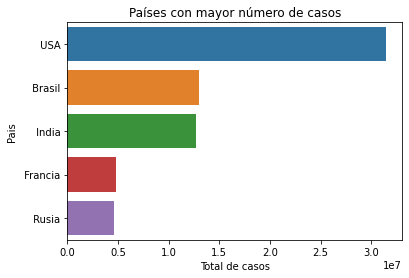

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Países con mayor número de casos")
sns.barplot(x = 'Total de casos',
            y = 'Pais',
            orient = 'h',
            data = df.sort_values(by=['Total de casos'], ascending=False).head(5))
plt.show()

Países con mayor número de casos nuevos

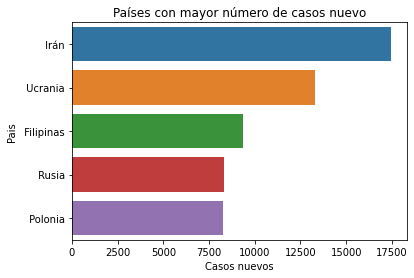

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Países con mayor número de casos nuevo")
sns.barplot(x = 'Casos nuevos',
            y = 'Pais',
            orient = 'h',
            data = df.sort_values(by=['Casos nuevos'], ascending=False).head(5))
plt.show()

Países con mayor número de número de muertes

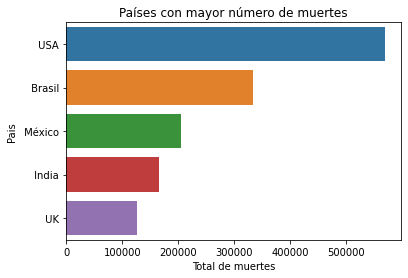

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Países con mayor número de muertes")
sns.barplot(x = 'Total de muertes',
            y = 'Pais',
            orient = 'h',
            data = df.sort_values(by=['Total de muertes'], ascending=False).head(5))
plt.show()

Países con mayor número de muertes nuevas

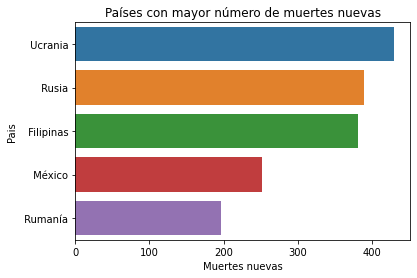

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Países con mayor número de muertes nuevas ")
sns.barplot(x = 'Muertes nuevas',
            y = 'Pais',
            orient = 'h',
            data = df.sort_values(by=['Muertes nuevas'], ascending=False).head(5))
plt.show()

Países con mayor número de recuperados

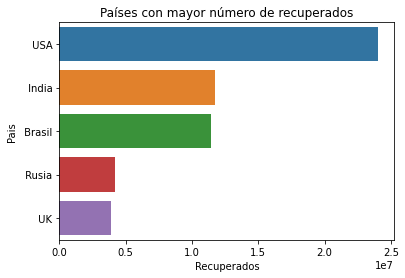

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Países con mayor número de recuperados")
sns.barplot(x = 'Recuperados',
            y = 'Pais',
            orient = 'h',
            data = df.sort_values(by=['Recuperados'], ascending=False).head(5))
plt.show()

Países con mayor número de casos activos

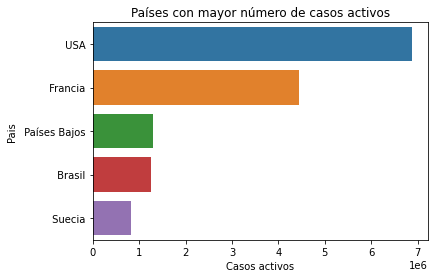

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Países con mayor número de casos activos")
sns.barplot(x = 'Casos activos',
            y = 'Pais',
            orient = 'h',
            data = df.sort_values(by=['Casos activos'], ascending=False).head(5))
plt.show()

Países con mayor número de casos críticos

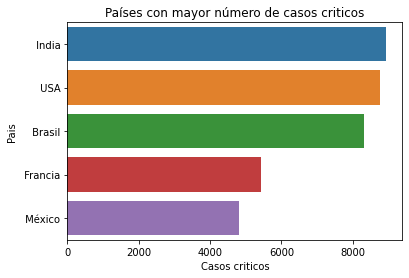

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Países con mayor número de casos criticos")
sns.barplot(x = 'Casos criticos',
            y = 'Pais',
            orient = 'h',
            data = df.sort_values(by=['Casos criticos'], ascending=False).head(5))
plt.show()

In [ ]:
df.to_csv('estadísticas_a_nivel_mundial_covid_19_limpio.csv')

In [ ]:
df.describe()

,Total de casos,Casos nuevos,Total de muertes,Muertes nuevas,Recuperados,Casos activos,Casos criticos
count,2.210000e+02,221.000000,221.000000,221.000000,2.210000e+02,2.210000e+02,221.000000
mean,5.997351e+05,493.461538,13014.434389,12.574661,4.833635e+05,1.033572e+05,446.045249
std,2.529182e+06,1936.591710,50354.016686,54.929873,2.027146e+06,5.686254e+05,1296.280623
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.275000e+03,0.000000,61.000000,0.000000,2.825000e+03,2.480000e+02,0.000000
50%,3.693400e+04,0.000000,568.000000,0.000000,2.584100e+04,2.834000e+03,12.000000
75%,2.568370e+05,3.000000,4636.000000,0.000000,2.199120e+05,2.596600e+04,189.000000
max,3.149698e+07,17430.000000,569282.000000,430.000000,2.405856e+07,6.869132e+06,8944.000000


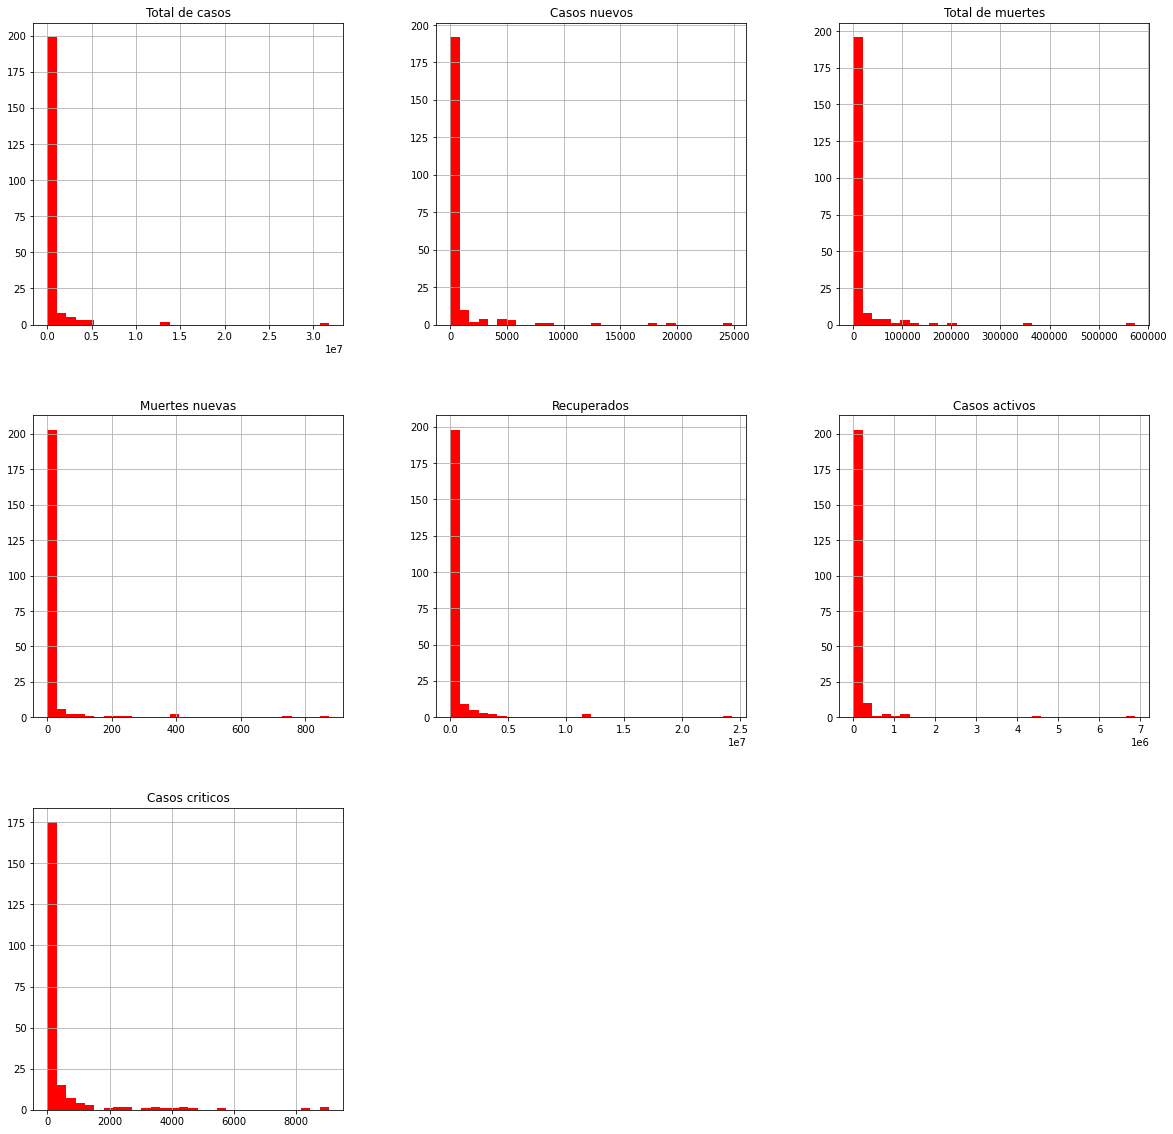

In [ ]:
df.hist(bins = 30, figsize=(20,20), color = 'r');